In [1]:
import psycopg2
import pandas as pd

In [2]:
import json

with open('config.json') as f:
    conf = json.load(f)

In [132]:
conn_str = "host='{}' dbname='{}' port={} user='{}' password='{}'".format(conf['host'], conf['database'], conf['port'], conf['user'], conf['passw'])

In [134]:
conn = psycopg2.connect(conn_str)

In [135]:
cur = conn.cursor()

 How many unique search terms are there? What does the distribution look like 

In [8]:
#cur.execute("create table SearchTermsCount as select tags, count(*) as cnt from ios_events group by tags order by cnt desc; ")
cur.execute("create table SearchTermsCount as select tags, count(*) as cnt from ios_events group by tags; ")

In [9]:
df = pd.read_sql('select * from SearchTermsCount;',con=conn)

In [10]:
len(df) # Number of Unique search terms

2729143

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dfSorted = df.sort_values('cnt', ascending=False) #keep the most occuring search terms at the top
dfSorted.head(50)

,tags,cnt
7503,,1778100
284,yes,722680
53973,happybirthday,400063
1655,excited,388321
831,Recents,371527
6167,eyeroll,339316
6165,wink,294914
313,flirty,284077
7513,kisses,284066
320,sassy,262052


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


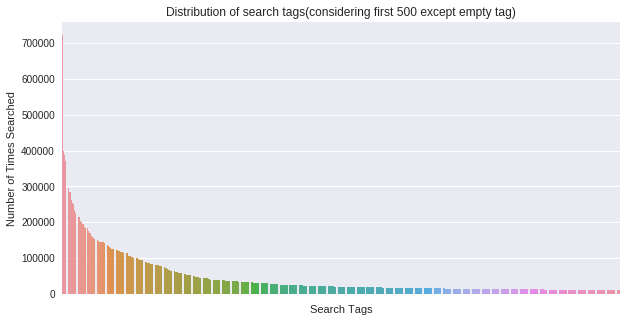

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(y="cnt", x="tags", data=dfSorted[1:].head(500))
ax.set_title('Distribution of search tags(considering first 500 except empty tag)')
ax.set_xlabel('Search Tags')
ax.set_xticklabels([])
ax.set_ylabel('Number of Times Searched')
plt.show()

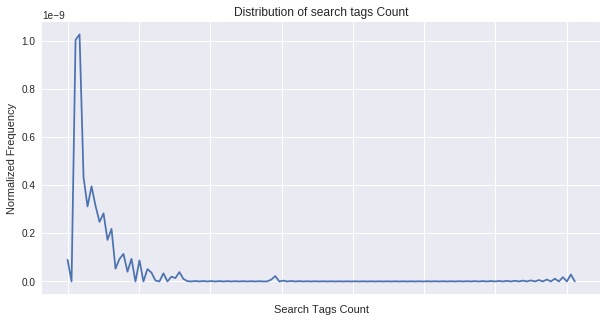

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(dfSorted.cnt, hist= False)
ax.set_title('Distribution of search tags Count')
ax.set_xlabel('Search Tags Count')
ax.set_xticklabels([])
ax.set_ylabel('Normalized Frequency')
plt.show()

/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


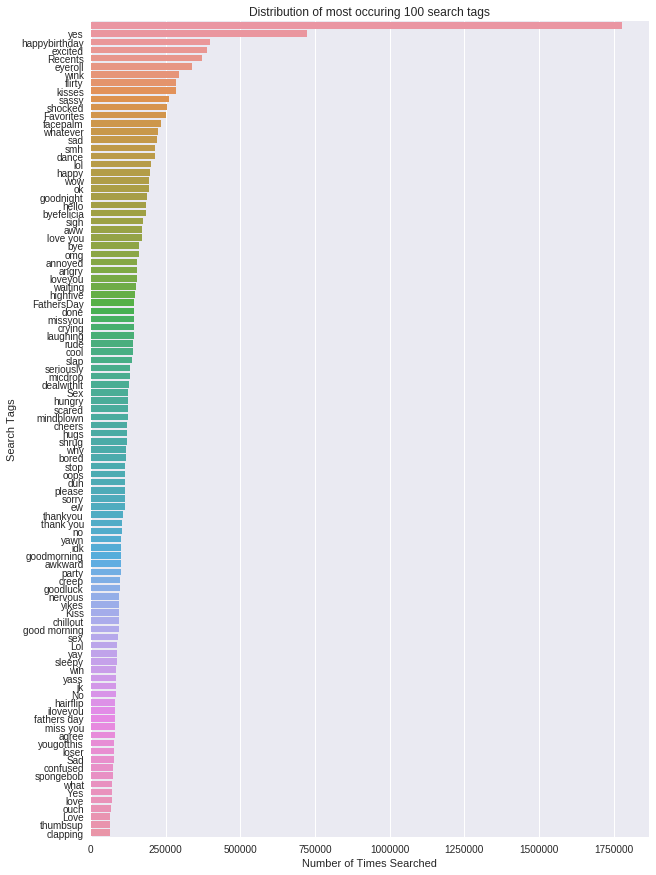

In [15]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="cnt", y="tags", data=dfSorted.head(100))
ax.set_title('Distribution of most occuring 100 search tags')
ax.set_ylabel('Search Tags')
ax.set_xlabel('Number of Times Searched')
plt.show()

/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


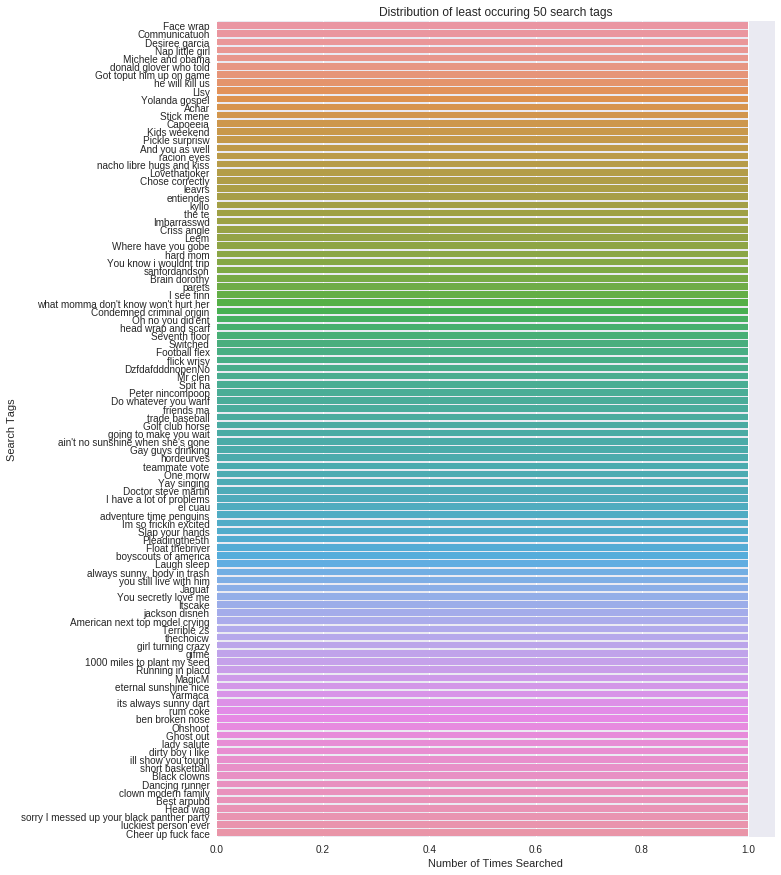

In [16]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="cnt", y="tags", data=dfSorted.tail(100))
ax.set_title('Distribution of least occuring 50 search tags')
ax.set_ylabel('Search Tags')
ax.set_xlabel('Number of Times Searched')
plt.show()

In [17]:
df.tail(50)

,tags,cnt
2729093,Just a little outside,1
2729094,Squidward awake,1
2729095,cinderella dery,1
2729096,Bers,1
2729097,lil duval in weed,1
2729098,Ctabs,1
2729099,Patch notes,1
2729100,Hetero life mates,1
2729101,Nibling,1
2729102,mo vaughn,1


In [18]:
timedf = pd.read_sql('select count(*) as cnt, extract (hour from timestamp) as hr from ios_events group by hr order by hr', con=conn)

In [19]:
timedf.head()

,cnt,hr
0,621983,0
1,353555,1
2,246864,2
3,319130,3
4,637112,4


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


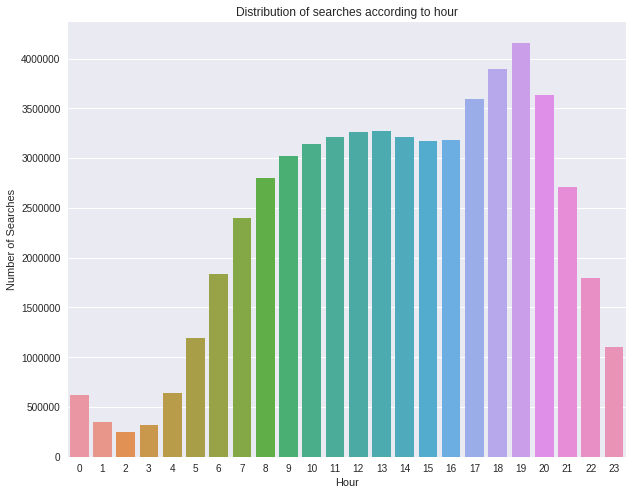

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(y="cnt", x="hr", data=timedf)
ax.set_title('Distribution of searches according to hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Searches')
plt.show()

In [21]:
cur.execute("create table SearchTermsSharedCount as select riffid, count(*) as cnt from ios_events where eventname = 'share' group by riffid; ")

In [22]:
dfShared = pd.read_sql('select * from SearchTermsSharedCount;',con=conn)

In [23]:
len(dfShared)

481394

In [24]:
dfSharedSorted = dfShared.sort_values('cnt', ascending=False).reset_index(drop=True)

dfSharedSorted.head(50)

,riffid,cnt
0,7513882,68950
1,7212866,57266
2,5488810,52362
3,5795910,46697
4,5663730,43332
5,5943705,42080
6,4790020,41932
7,3850980,41082
8,4988274,40342
9,5751664,40076


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


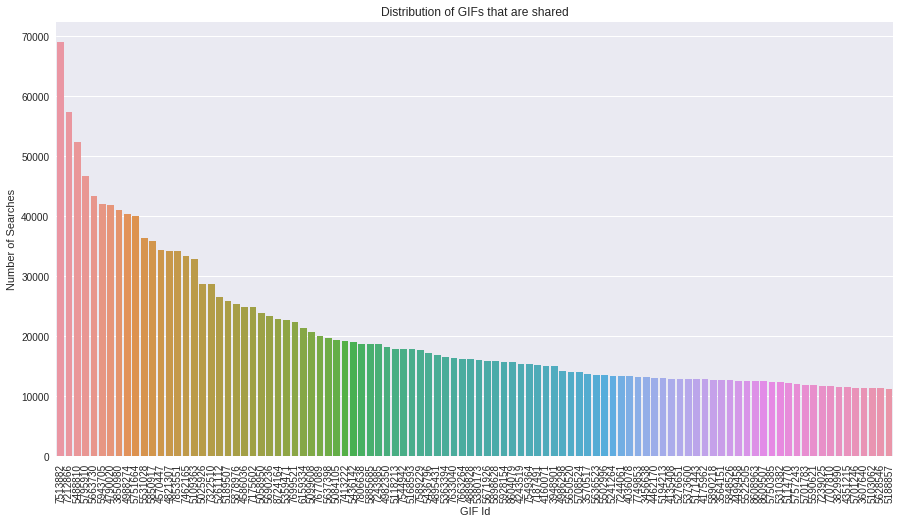

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
# ax = sns.barplot(x="riffid", y="cnt", orient='v', data=dfSharedSorted.head(100))
ax = sns.barplot(dfSharedSorted[:100].riffid, dfSharedSorted[:100].cnt, order = dfSharedSorted[:100].riffid)
ax.set_title('Distribution of GIFs that are shared')
ax.set_xlabel('GIF Id')
ax.set_xticklabels(dfSharedSorted.riffid[:100])
for item in ax.get_xticklabels(): item.set_rotation(90)
ax.set_ylabel('Number of Searches')
plt.show()

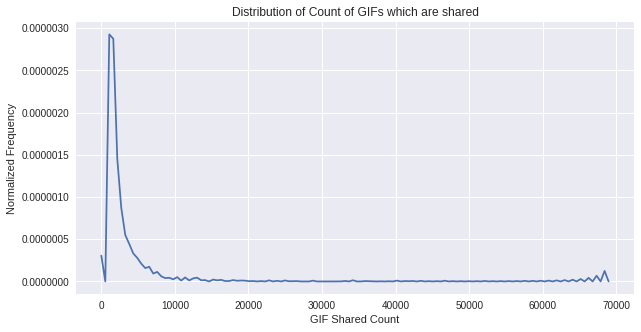

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(dfSharedSorted.cnt, hist= False)
ax.set_title('Distribution of Count of GIFs which are shared')
ax.set_xlabel('GIF Shared Count')
# ax.set_xticklabels([])
ax.set_ylabel('Normalized Frequency')
plt.show()

In [31]:
dfActions = pd.read_sql('select actions, count(*) as cnt from ios_events group by actions order by cnt;', con=conn)
dfActions = dfActions.sort_values('cnt', ascending=False).reset_index(drop=True)
dfActions

,actions,cnt
0,qwerty,28598330
1,autosuggest,12659303
2,tag,8973903
3,,2621179
4,didyoumean_stream,1495606
5,search_cancel,999987
6,telescoping,873510
7,didyoumean_search,352573
8,recentshares,73039
9,itemview_gif,61054


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


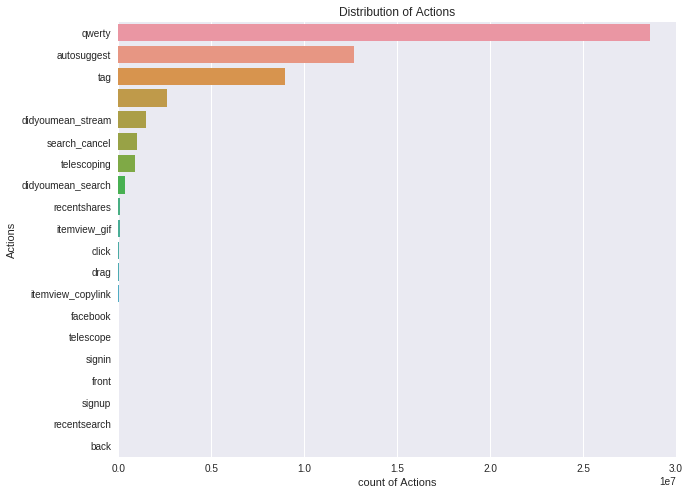

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="cnt", y="actions", data=dfActions)
ax.set_title('Distribution of Actions')
ax.set_xlabel('count of Actions')
ax.set_ylabel('Actions')
plt.show()

In [77]:
df = pd.read_sql('select actions, extract (hour from timestamp)as hr, count(*) as cnt from ios_events where actions in (select actions from ios_events group by actions order by count(*) desc limit 6) group by actions,hr;', con=conn)
df.actions[df.actions=='']='Blank Action'

/home/sameer/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [78]:
df.head()


,actions,hr,cnt
0,qwerty,1,170772
1,autosuggest,3,81165
2,didyoumean_stream,17,93144
3,qwerty,18,1992291
4,qwerty,21,1346647


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


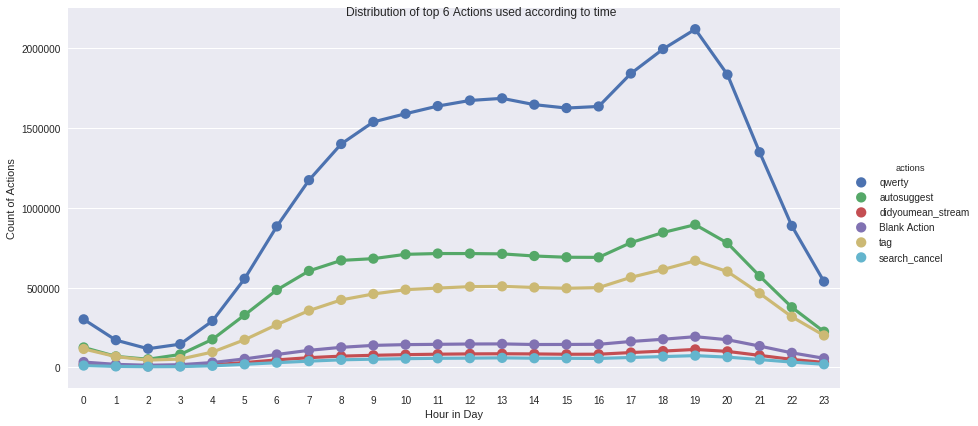

In [80]:
ax = sns.factorplot(x="hr", y="cnt", hue="actions", kind="point", data=df, size=6, aspect=2)
ax.set_xlabels('Hour in Day')
ax.set_ylabels('Count of Actions')
ax.fig.suptitle('Distribution of top 6 Actions used according to time')
plt.show()

In [142]:
df = pd.read_sql('select tags, extract (hour from timestamp)as hr, count(tags) as cnt from ios_events where tags in (select tags from ios_events group by tags order by count(*) desc limit 25) group by tags, hr;', con=conn)
df.tags[df.tags=='']='Blank'

/home/sameer/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [143]:
df.head()

,tags,hr,cnt
0,kisses,9,13532
1,Recents,4,4028
2,Recents,10,20983
3,kisses,11,14860
4,yes,12,42314


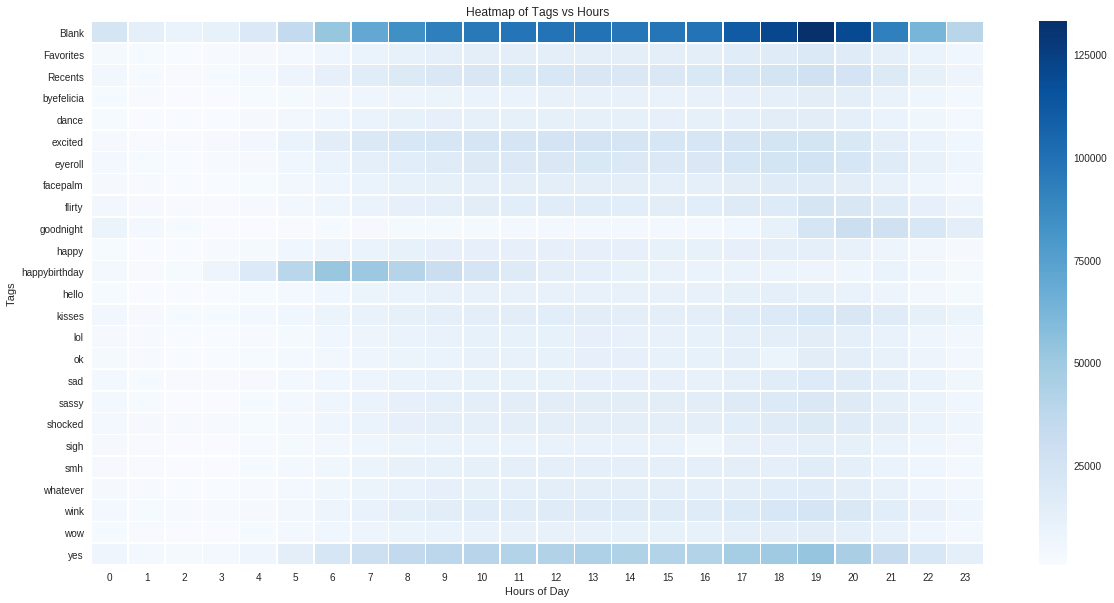

In [144]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df.pivot(index='tags', columns='hr', values='cnt'), annot=False, linewidths=.5, cmap="Blues")
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Tags')
ax.set_title('Heatmap of Tags vs Hours')
plt.show()

In [145]:
dfN = df.pivot(index='tags', columns='hr', values='cnt')
# 1: substract mean
dfNorm = dfN.sub(dfN.mean(axis=1), axis=0)
# 2: divide by standard dev
dfNorm = dfNorm.div( dfN.std(axis=1), axis=0 )

In [146]:
dfNorm.head()

hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
tags,,,,,,,,,,,,,,,,,,,,,
Blank,-1.299721,-1.565790,-1.663084,-1.621129,-1.404751,-1.020063,-0.548680,-0.096920,0.257701,0.490711,...,0.589191,0.605333,0.633931,0.959748,1.217281,1.521050,1.174423,0.468611,-0.286608,-0.886049
Favorites,-1.266563,-1.516268,-1.654836,-1.585376,-1.372424,-1.120960,-0.664282,-0.243653,0.148313,0.475392,...,0.599716,0.605344,0.651064,0.991858,1.179840,1.592029,1.188633,0.503351,-0.166983,-0.817270
Recents,-1.366028,-1.626252,-1.695417,-1.638761,-1.404412,-0.949817,-0.436604,0.065817,0.388829,0.551929,...,0.583322,0.573880,0.643902,0.863413,1.114807,1.431442,1.081942,0.394347,-0.377373,-0.954600
byefelicia,-1.258219,-1.482713,-1.562081,-1.538548,-1.348201,-1.063720,-0.659031,-0.278108,-0.006547,0.249787,...,0.665780,0.646861,0.663704,0.969873,1.195520,1.648429,1.407324,0.564954,-0.287337,-0.847763
dance,-1.391573,-1.589832,-1.667348,-1.643033,-1.364973,-0.915255,-0.455770,0.139212,0.485228,0.614699,...,0.754768,0.568979,0.705100,0.963209,1.213006,1.254362,0.880498,0.201557,-0.537650,-1.030594


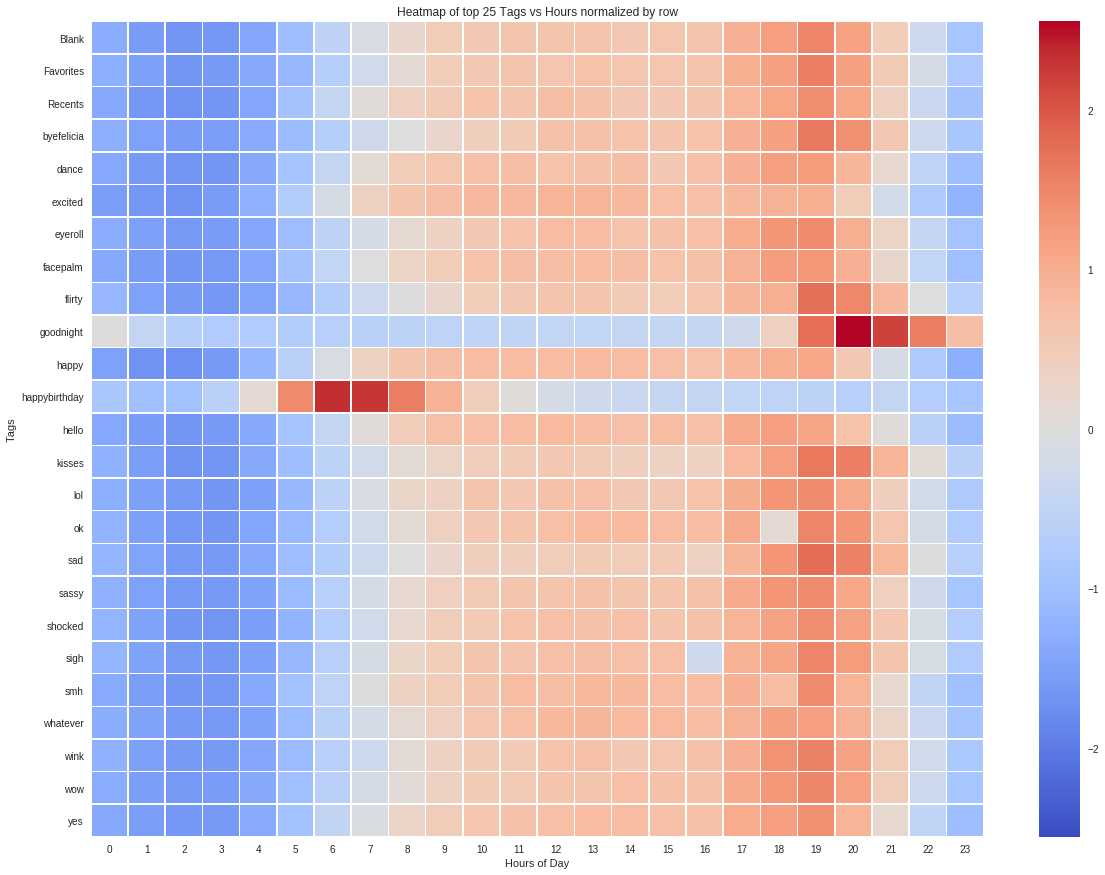

In [153]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(dfNorm, annot=False, linewidths=.5, cmap="coolwarm")
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Tags')
ax.set_title('Heatmap of top 25 Tags vs Hours normalized by row')
plt.show()

In [131]:
cur.close()
conn.close()

In [159]:
df = pd.read_sql('select keyboardid, extract (hour from timestamp)as hr, count(*) as cnt from ios_events where keyboardid in (select keyboardid from ios_events group by keyboardid order by count(*) desc limit 25) group by keyboardid, hr order by cnt;', con = conn)
df.head()

,keyboardid,hr,cnt
0,MTA5MDc5MjYz,3,1
1,MTA0NTA4MzU2,6,1
2,MTAwNjU2NDgx,3,1
3,MTEzNDExNjA3,4,1
4,OTMxNzk3NzU,1,1


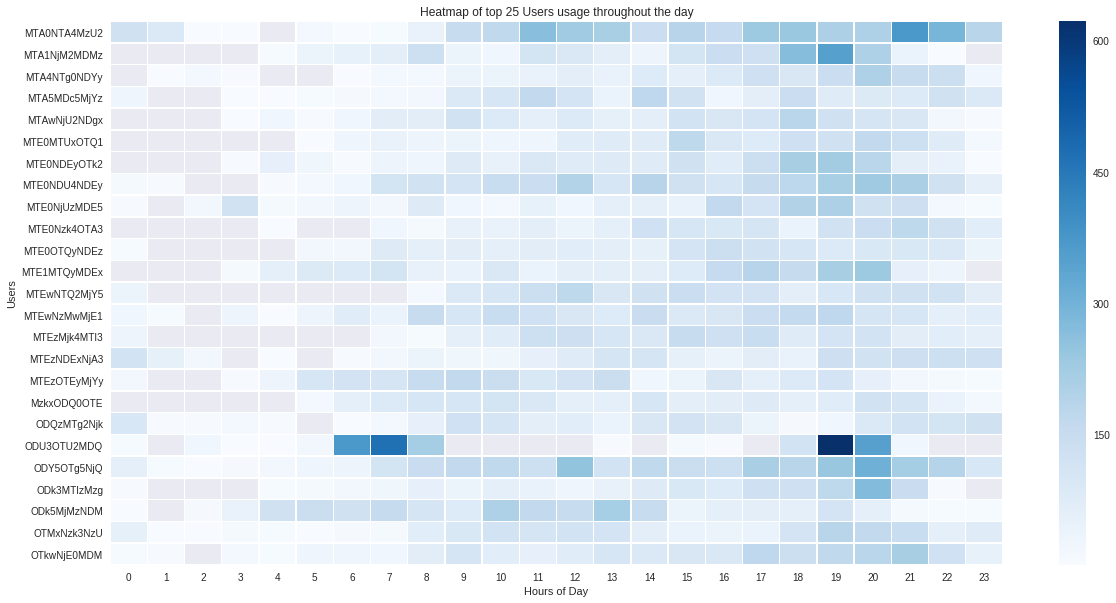

In [164]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df.pivot(index='keyboardid', columns='hr', values='cnt'), annot=False, linewidths=.5, cmap="Blues")
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Users')
ax.set_title('Heatmap of top 25 Users usage throughout the day')
plt.show()

In [165]:
dfN = df.pivot(index='keyboardid', columns='hr', values='cnt')
# 1: substract mean
dfNorm = dfN.sub(dfN.mean(axis=1), axis=0)
# 2: divide by standard dev
dfNorm = dfNorm.div( dfN.std(axis=1), axis=0 )

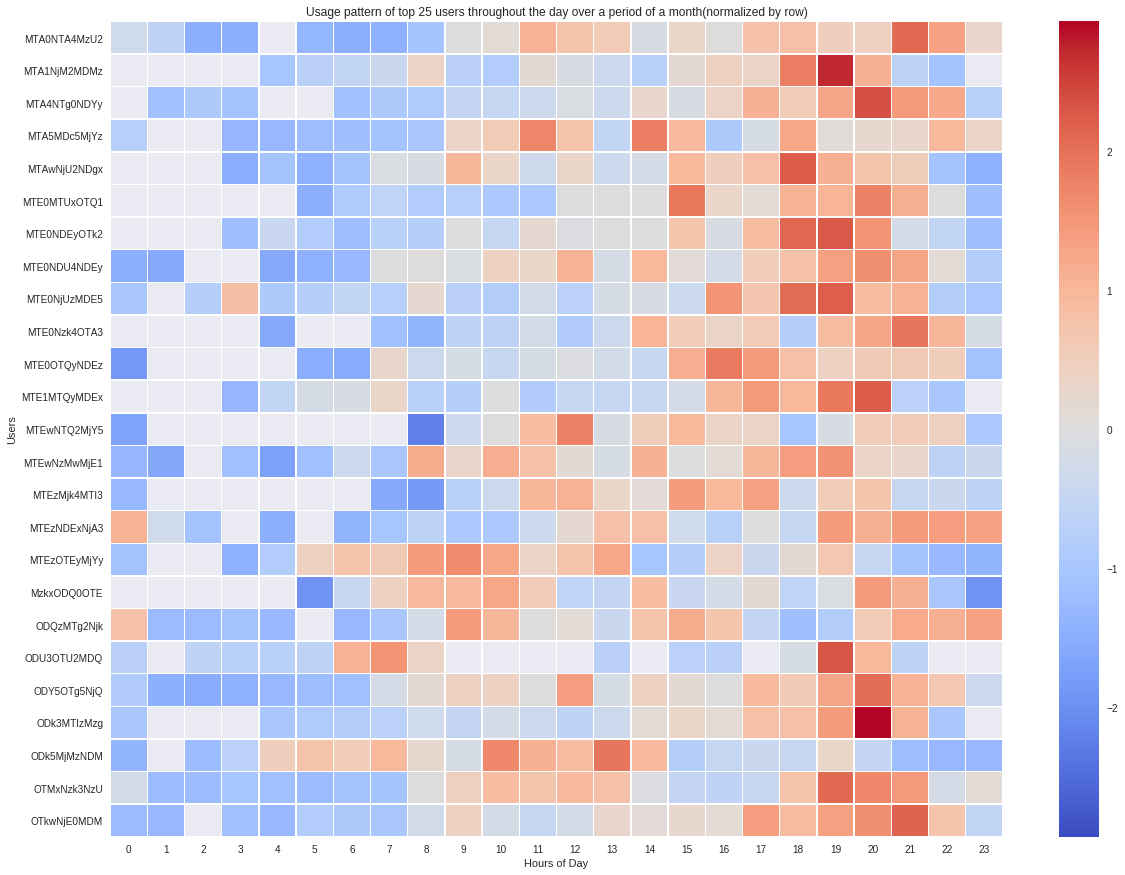

In [169]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(dfNorm, annot=False, linewidths=.5, cmap="coolwarm")
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Users')
ax.set_title('Usage pattern of top 25 users throughout the day over a period of a month(normalized by row)')
plt.show()

In [180]:
df = pd.read_sql('select keyboardid, riffid, count(*) as cnt from ios_events where keyboardid in (select keyboardid from ios_events group by keyboardid order by count(*) desc limit 25) and riffid in (select riffid from ios_events where riffid<>0 group by riffid order by count(*) desc limit 25) group by keyboardid, riffid;', con=conn)
df.riffid.unique()

array(['5109363', '5795910', '4790020', '5878976', '5850917', '7513882',
       '5531028', '5058950', '4821307', '5261112', '7212866', '7853551',
       '5488810', '7175602', '4570447', '5663730', '7322510', '5189507',
       '5943705', '4988274', '4586036', '3850980', '5025926', '5751664',
       '7462165'], dtype=object)

In [174]:
dfN = df.pivot(index='keyboardid', columns='riffid', values='cnt')
# 1: substract mean
dfNorm = dfN.sub(dfN.mean(axis=1), axis=0)
# 2: divide by standard dev
dfNorm = dfNorm.div( dfN.std(axis=1), axis=0 )


In [181]:
dfNorm.head()

riffid,3850980,4570447,4586036,4790020,4821307,4988274,5025926,5058950,5109363,5189507,...,5795910,5850917,5878976,5943705,7175602,7212866,7322510,7462165,7513882,7853551
keyboardid,,,,,,,,,,,,,,,,,,,,,
MTA0NTA4MzU2,NaN,NaN,NaN,-0.956183,0.239046,NaN,NaN,NaN,0.239046,NaN,...,NaN,NaN,1.434274,NaN,NaN,NaN,NaN,NaN,NaN,-0.956183
MTA1NjM2MDMz,NaN,-0.726273,NaN,NaN,-0.726273,NaN,NaN,NaN,-0.726273,1.815683,...,NaN,NaN,NaN,-0.726273,NaN,NaN,NaN,NaN,NaN,NaN
MTA4NTg0NDYy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.577350,NaN,NaN,NaN,NaN
MTA5MDc5MjYz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTAwNjU2NDgx,-0.520013,NaN,-0.895577,-0.520013,NaN,NaN,0.982246,NaN,1.733375,NaN,...,-0.895577,NaN,-0.895577,-0.895577,NaN,-0.144448,NaN,-0.520013,1.733375,-0.144448


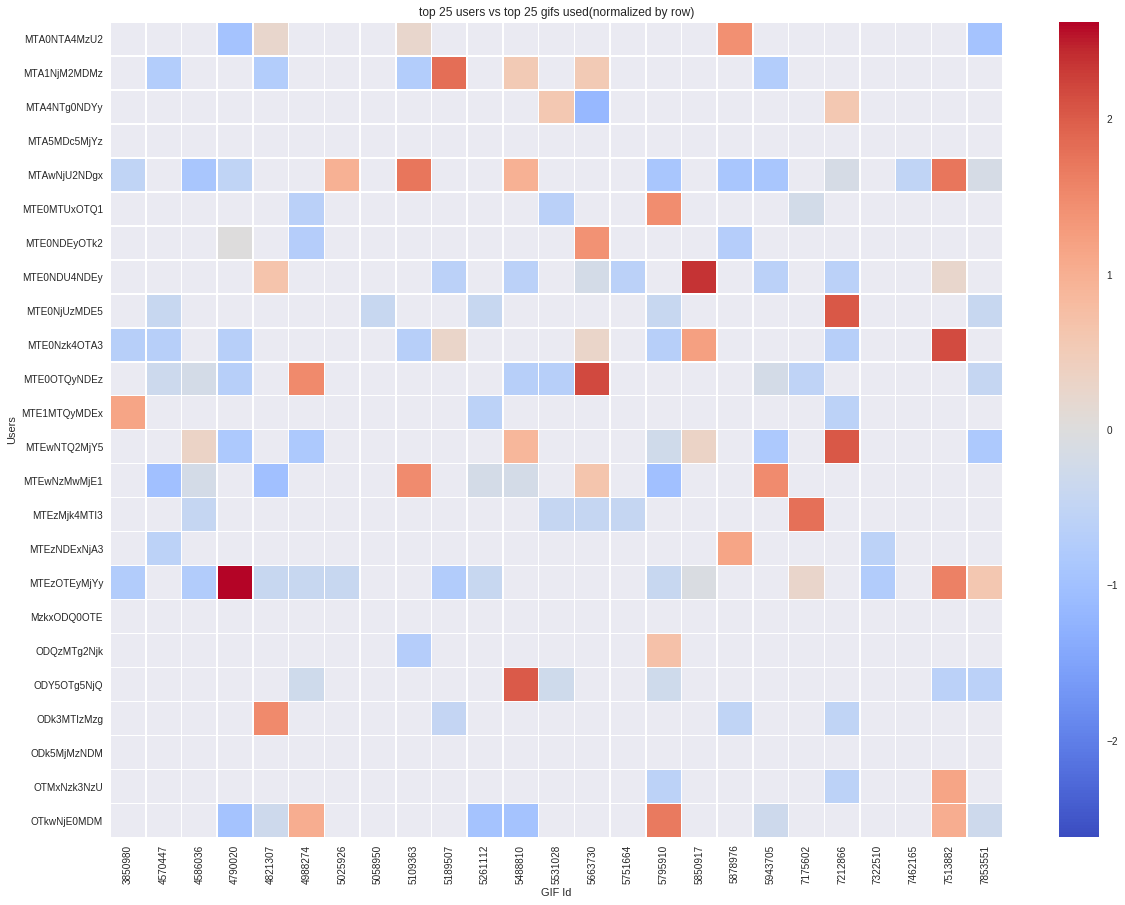

In [183]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(dfNorm, annot=False, linewidths=.5, cmap="coolwarm")
ax.set_xlabel('GIF Id')
ax.set_ylabel('Users')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('top 25 users vs top 25 gifs used(normalized by row)')
plt.show()